In [2]:
import sys,os
import pylab as py
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import leastsq,minimize,root
from scipy.integrate import quad,fixed_quad, simps, dblquad
import pandas as pd
from tools import save,load,tex,ProgressBar,com,fill_between
from  matplotlib import rc
import matplotlib.gridspec as gridspec
%matplotlib inline  
%config InlineBacend.figure_format = 'retina' 
rc('font',**{'family':'sans-serif','sans-serif':['Times-Roman']})
rc('text',usetex=True)
#import lhapdf
from numpy import linalg as LA
from scipy.interpolate import interp1d
import pandas as pd
tex = lambda x: r'$\mathrm{'+x+'}$'

In [3]:
def get_data(fname):  
  F=open(fname)
  L=F.readlines()
  F.close()
  L=[l.strip() for l in L]
  L=[l for l in L if l!='']
  L=[[float(x) for x in l.split()] for l in L]
  L2=[]
  for l in L:
    chi2=l[1]
    w=l[2]
    du=l[3]
    dd=l[4]
    duEX=l[5]
    ddEX=l[6]
    data=l[7:]
    N=len(data)
    x =[data[3*i] for i in range(N/3) ]
    Hu=[data[3*i+1] for i in range(N/3) ]
    Hd=[data[3*i+2] for i in range(N/3) ]
    if Hd[10]==0: continue
    #if Hd[10]==0: continue
    L2.append([chi2,w,du,dd,duEX,ddEX,x,Hu,Hd])
  return pd.DataFrame(L2,columns=['chi2','w','du','dd','duEX','ddEX','x','Hu','Hd'])


#j, ChiSQ[j], Weight[j], deltaU_Cal[j], deltaD_Cal[j], deltaU_EX_Cal[j], deltaD_EX_Cal[j], xB[0,j],Hu[0,j], Hd[0,j], xB[1,j], Hu[1,j], Hd[1,j],...,(from 0 to 299),...,xB[299,j], Hu[299,j], Hd[299,j]

In [4]:
data1=get_data('scale_cov_1/f1_weight_clas_p_pim_1.dat')
data100=get_data('scale_cov_100_new/f100_weight_clas_p_pim_1.dat')

(0.04, 0.06)

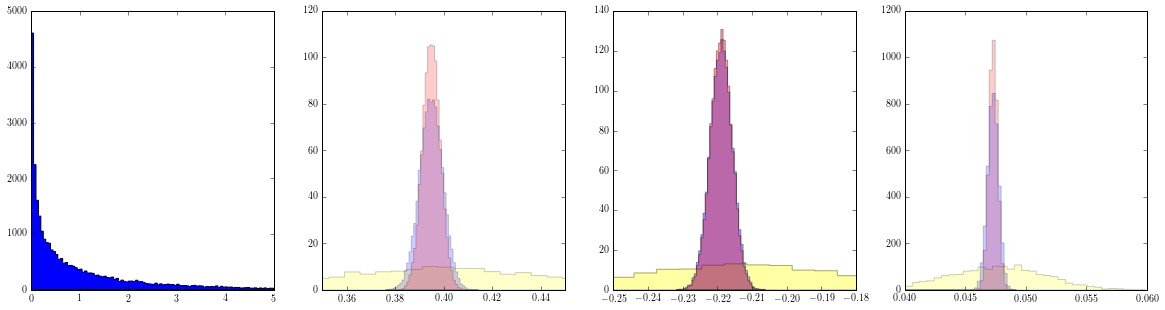

In [14]:
nrows,ncols=1,4
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
ax.hist(data100['chi2'],range=(0,5),bins=100,histtype='stepfilled');

ax=plt.subplot(nrows,ncols,2)
ax.hist(data1['du'],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist(data100['du'],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
ax.hist(data100['du'],histtype='stepfilled',weights=data100['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(0.35,0.45)

ax=plt.subplot(nrows,ncols,3)
ax.hist(data1['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',weights=data100['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(-0.25,-0.18)

ax=plt.subplot(nrows,ncols,3)
ax.hist(data1['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',weights=data100['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(-0.25,-0.18)

ax=plt.subplot(nrows,ncols,4)
ax.hist([data1['Hu'][i][5] for i in data1.index],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist([data100['Hu'][i][5] for i in data100.index],weights=data100['w'],histtype='stepfilled',bins=200,normed=1,facecolor='r',alpha=0.2);
ax.hist([data100['Hu'][i][5] for i in data100.index],histtype='stepfilled',bins=200,normed=1,facecolor='b',alpha=0.2);

#ax.hist(data100['Hu'][100],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
#ax.hist(data100['Hu'][100],histtype='stepfilled',weights=data['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(0.04,0.06)

In [15]:
data1=get_data('scale_cov_1/f1_weight_solid_3he_pip_1.dat')
data100=get_data('scale_cov_100_new/f100_weight_solid_3he_pip_1.dat')

(0.04, 0.06)

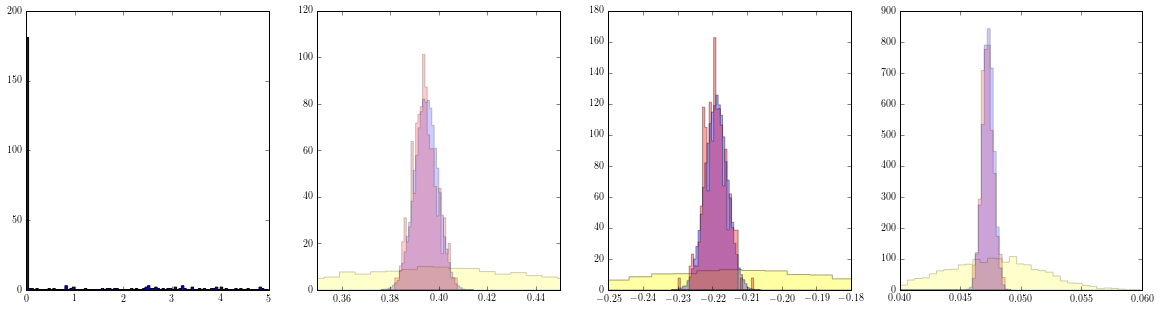

In [17]:
nrows,ncols=1,4
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
ax.hist(data100['chi2'],range=(0,5),bins=100,histtype='stepfilled');

ax=plt.subplot(nrows,ncols,2)
ax.hist(data1['du'],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist(data100['du'],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
ax.hist(data100['du'],histtype='stepfilled',weights=data100['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(0.35,0.45)

ax=plt.subplot(nrows,ncols,3)
ax.hist(data1['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',weights=data100['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(-0.25,-0.18)

ax=plt.subplot(nrows,ncols,3)
ax.hist(data1['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
ax.hist(data100['dd'],histtype='stepfilled',weights=data100['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(-0.25,-0.18)

ax=plt.subplot(nrows,ncols,4)
ax.hist([data1['Hu'][i][5] for i in data1.index],histtype='stepfilled',bins=40,normed=1,facecolor='Yellow',alpha=0.2);
ax.hist([data100['Hu'][i][5] for i in data100.index],weights=data100['w'],histtype='stepfilled',bins=200,normed=1,facecolor='r',alpha=0.2);
ax.hist([data100['Hu'][i][5] for i in data100.index],histtype='stepfilled',bins=200,normed=1,facecolor='b',alpha=0.2);

#ax.hist(data100['Hu'][100],histtype='stepfilled',bins=40,normed=1,facecolor='b',alpha=0.2);
#ax.hist(data100['Hu'][100],histtype='stepfilled',weights=data['w'],bins=40,normed=1,facecolor='r',alpha=0.2)
ax.set_xlim(0.04,0.06)